In [24]:
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import*
import numpy as np
import matplotlib.pyplot as plt



with MPRester("TSpOfnCNHrXI8ZzR") as m:

    #Recuperation de la structure
    structure = m.get_phonon_bandstructure_by_material_id("mp-5077")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Visualisation des branches acoustiques pour $NaLi_2 Sb$

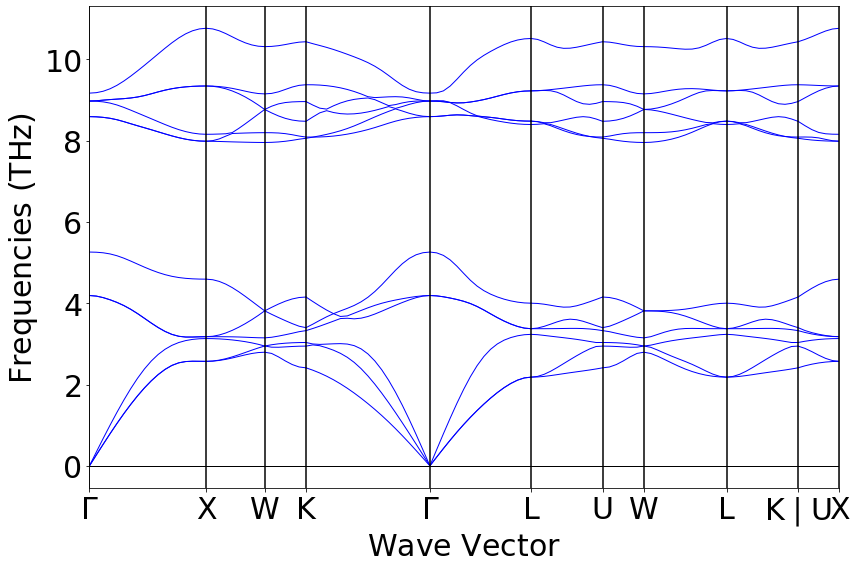

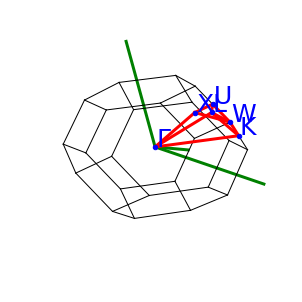

In [25]:
ph = PhononBSPlotter(structure)
#Visualisation 
ph.get_plot()

#Branche dans la zone de Brillouin
ph.plot_brillouin()

## Calcul de la vitesse de son $v_s$ pour 3 branches acoustiques

La vitesse du son dans un solide s'obtient par $$ \frac{\partial \omega_k}{\partial k}$$
La vitesse du son est calculée comme la valeure absolue de la pente. Pour avoir la vitesse du son en m/s, les vecteurs d'onde sont écrit en angstroms et donc il faut multiplier par $10^{-10}$ et multiplier par $10^{12}$ comme les fréquences sont données en THz . Quand $\omega = 0$ , la pente de la branche acoustique à cet endroit la est la vitesse du son. 

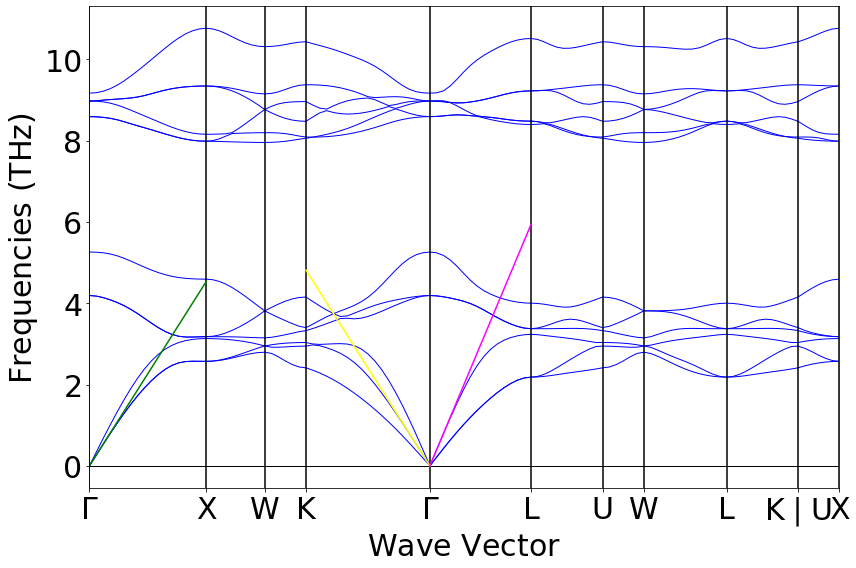

Vitesse du son pour la première branche acoustique =  3070.3798945043263 m/s
Vitesse du son pour la deuxième branche acoustique =  3073.1375491262143 m/s
Vitesse du son pour la troisième branche acoustique =  4644.42550540296 m/s


In [23]:
q1 = data.get('distances')[0]
q2 = data.get('distances')[3]
q3 = data.get('distances')[4]

f1 = data.get('frequency')[0][0]
f2 = data.get('frequency')[3][1]
f3 = data.get('frequency')[4][2]

x = np.array([[q1[0], q1[1]], [q2[-2], q2[-1]], [q3[0], q3[1]]])
y = np.array([[f1[0], f1[1]], [f2[-2], f2[-1]], [f3[0], f3[1]]])

#On calcule a et b dans y = ax+b , la tangente à la branche acoustique
coef = [0,0,0]
for i in range(0,3):
    coef[i] = np.polyfit(x[i], y[i], 1)
    
ab1 = np.linspace(q1[0],q1[-1],1000)
ab2 = np.linspace(q2[0],q2[-1],1000)
ab3 = np.linspace(q3[0],q3[-1],1000)

tang1 = coef[0][0]*ab1 + coef[0][1]
tang2 = coef[1][0]*ab2 + coef[1][1]
tang3 = coef[2][0]*ab3 + coef[2][1]


ph.get_plot()
plt.plot(ab1, tang1, color='green')
plt.plot(ab2, tang2, color='yellow')
plt.plot(ab3, tang3, color='magenta')
plt.show()

conversion = (2*np.pi*1e12*1e-10)
vs1 = np.abs(coef[0][0])* conversion
vs2 = np.abs(coef[1][0])* conversion
vs3 = np.abs(coef[2][0])* conversion


print("Vitesse du son pour la première branche acoustique = ", v1, "m/s")
print("Vitesse du son pour la deuxième branche acoustique = ", v2, "m/s")
print("Vitesse du son pour la troisième branche acoustique = ", v3, "m/s")